In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set_palette('Set2')
from sklearn.model_selection import train_test_split

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [57]:
train=pd.read_csv(r"train_prep.csv")
test=pd.read_csv(r"test_prep.csv")
predictions=pd.read_csv(r"data/gender_submission.csv")

### Model Validation

In [58]:
train.head()

,PassengerId,Survived,SibSp,Parch,Fare,Cabin_flag,Age_,Pclass_low,Pclass_med,Sex_male,Embarked_Q,Embarked_S,Age_scaled,Fare_scaled
0,1,0,1,0,7.2500,0,22.0,1,0,1,0,1,0.2750,0.014151
1,2,1,1,0,71.2833,1,38.0,0,0,0,0,0,0.4750,0.139136
2,3,1,0,0,7.9250,0,26.0,1,0,0,0,1,0.3250,0.015469
3,4,1,1,0,53.1000,1,35.0,0,0,0,0,1,0.4375,0.103644
4,5,0,0,0,8.0500,0,35.0,1,0,1,0,1,0.4375,0.015713


In [59]:
X=train[list(set(train.columns)-{'PassengerId','Survived','Age_','Fare'})]
Y=train['Survived']

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42,stratify=Y)

In [61]:

# y_train=train_v5['Survived']
# X_train=train_v5[list(set(train_v5.columns)-{'PassengerId','Survived'})]
# X_test=test_v5[list(set(test_v5.columns)-{'PassengerId'})]
# X_train=

In [62]:
import statsmodels.api as sm
lg_reg_model = sm.GLM(y_train, sm.add_constant(X_train),family=sm.families.Binomial()).fit() # add const and famili bonom???


In [63]:
lg_reg_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            632.1014  
Link Function:      logit            BIC:            -3994.1212
Dependent Variable: Survived         Log-Likelihood: -305.05   
Date:               2021-02-22 14:20 LL-Null:        -473.99   
No. Observations:   712              Deviance:       610.10    
Df Model:           10               Pearson chi2:   730.      
Df Residuals:       701              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           3.2005   0.6115   5.2336 0.0000  2.0019  4.3991
Embarked_Q      0.3605   0.4443   0.8113 0.4172 -0.5104  1.2314
Embarked_S     -0.4470   0.2708  -1.6510 0.0987 -0.9777  0.0837
Cabin_flag      1.1450   0.3696   3.0981 0.0019  0.4206  1.8693
Pclass_med     -0.2664   0.4407  -0.6046 0.5454 -1.1302  0.5973
Age_scaled     -3.0268   0.6962  -4.3478 0.0000 -4.3912 -1.6623
Sex_male       -2.6580   0.2263 -11.7447 0.0000 -3.1015 -2.2144
Fare_scaled     0.9295   1.5171   0.6127 0.5401 -2.0439  3.9029
Parch          -0.1167   0.1284  -0.9094 0.3631 -0.3683  0.1348
SibSp          -0.2372   0.1249  -1.8981 0.0577 -0.4820  0.0077
Pclass_low     -1.4840   0.4611  -3.2182 0.0013 -2.3877 -0.5802
===============================================================

"""

In [64]:
def get_significant_vars (modelobject):
    var_p_vals_df = pd.DataFrame(modelobject.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return var_p_vals_df[var_p_vals_df.pvals <= 0.05][['pvals']]


significant_vars = get_significant_vars(lg_reg_model)
significant_vars

,pvals
const,1.662576e-07
Cabin_flag,1.947429e-03
Age_scaled,1.374802e-05
Sex_male,7.522628e-32
Pclass_low,1.290005e-03


In [65]:
sig_var=['Sex_male','Cabin_flag','Age_scaled','Pclass_low']
X_train=X_train[sig_var]
X_test=X_test[sig_var]

In [66]:
import statsmodels.api as sm
lg_reg_model2 = sm.GLM(y_train, sm.add_constant(X_train),family=sm.families.Binomial()).fit() # add const and famili bonom???
lg_reg_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            637.0875  
Link Function:      logit            BIC:            -4016.5436
Dependent Variable: Survived         Log-Likelihood: -313.54   
Date:               2021-02-22 14:20 LL-Null:        -473.99   
No. Observations:   712              Deviance:       627.09    
Df Model:           4                Pearson chi2:   740.      
Df Residuals:       707              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           2.3100   0.3462   6.6725 0.0000  1.6315  2.9885
Sex_male       -2.5949   0.2107 -12.3144 0.0000 -3.0079 -2.1819
Cabin_flag      1.4025   0.2756   5.0896 0.0000  0.8624  1.9426
Age_scaled     -2.4862   0.6379  -3.8975 0.0001 -3.7364 -1.2360
Pclass_low     -1.2270   0.2425  -5.0607 0.0000 -1.7023 -0.7518
===============================================================

"""

In [67]:
# ### Only significant variables included in the model

# pass_formula = 'Survived ~ C(Pclass)+C(Sex)  +SibSp  +Cabin_flag+Age_'


# lg_reg_model2 = smf.glm(formula=pass_formula, data=train_v4, family=sm.families.Binomial()).fit()
# lg_reg_model2.summary2()

In [68]:
"""PREDICTED CLASS WITH ACTUAL CLASS"""
def get_predictions ( test_class, model, test_data ):
    y_pred_df = pd.DataFrame( { 'actual': test_class,
                               'predicted_prob': model.get_prediction(sm.add_constant(test_data)).predicted_mean})
    return y_pred_df

'PREDICTED CLASS WITH ACTUAL CLASS'

In [69]:
'PREDICTED CLASS WITH ACTUAL CLASS'
predict_test_df = pd.DataFrame(get_predictions(y_test, lg_reg_model2,X_test))
predict_test_df.head()

'PREDICTED CLASS WITH ACTUAL CLASS'

,actual,predicted_prob
565,0,0.094680
160,0,0.053185
553,1,0.100143
860,0,0.058080
241,1,0.506578


In [70]:
#DEFAULT CUTOFF TAKEN =0.7
predict_test_df['predicted'] = predict_test_df.predicted_prob.apply(lambda x: '1' if x > 0.45 else '0')
predict_test_df[0:10]

,actual,predicted_prob,predicted
565,0,0.094680,0
160,0,0.053185,0
553,1,0.100143,0
860,0,0.058080,0
241,1,0.506578,1
559,1,0.491041,1
387,1,0.766956,1
536,0,0.430246,0
698,0,0.400074,0
99,0,0.207261,0


In [71]:
"""CONFUSION MATRIX"""
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("The model with dummy variable coding output: ")
confusion_matrix(predict_test_df.actual, predict_test_df.predicted.astype('int'))
lg_reg_report_50 = (classification_report(y_test, predict_test_df.predicted.astype('int')))
print(lg_reg_report_50)

"""PERFORMANCE MEASUREMENT"""
def measure_performance (clasf_matrix):
    measure = pd.DataFrame({
                        'sensitivity': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)], 
                        'specificity': [round(clasf_matrix[1,1]/(clasf_matrix[1,0]+clasf_matrix[1,1]),2)],
                        'recall': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)],
                        'precision': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[1,0]),2)],
                        'overall_acc': [round((clasf_matrix[0,0]+clasf_matrix[1,1])/
                                              (clasf_matrix[0,0]+clasf_matrix[0,1]+clasf_matrix[1,0]+clasf_matrix[1,1]),2)]
                       })
    return measure

cm = metrics.confusion_matrix(predict_test_df.actual, predict_test_df.predicted.astype(int))

'CONFUSION MATRIX'

The model with dummy variable coding output: 


array([[89, 21],
       [18, 51]])

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       110
           1       0.71      0.74      0.72        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



'PERFORMANCE MEASUREMENT'

In [72]:
lg_reg_metrics_df = pd.DataFrame(measure_performance(cm))
lg_reg_metrics_df

,sensitivity,specificity,recall,precision,overall_acc
0,0.81,0.74,0.81,0.83,0.78


In [73]:
"""optimal cut-off"""

lg_pred_prob_df = lg_reg_model2.predict(sm.add_constant(X_test))
n = len(X_test)

# -->since classifying someone as winning and then losing in actual would cost us a lot hence assigning double 
# penalty in this case

"""COST TABLE"""
d = {"Not-survived":(0,2), "Survived": (1,0)} 

costs = pd.DataFrame(d, index = ('Not-survived', 'Survived'))


print(costs)

'optimal cut-off'

'COST TABLE'

              Not-survived  Survived
Not-survived             0         1
Survived                 2         0


In [74]:
def frange(start, stop, step):
     s = start
     while s < stop:
         yield s
         s += step
#creating empty vectors to store the results.
cutoff = []
P11 = [] #correct classification of positive as positive
P00 = [] #correct classification of negative as negative
P10 = [] #misclassification of positive class to negative class
P01 = [] #misclassification of negative class to positive class

for i in frange(0.00, 1, 0.05):
    predicted_y = lg_pred_prob_df.map(lambda x: 1 if x > i else 0)
    tbl = metrics.confusion_matrix(y_test, predicted_y)

    if ( i <= 1):
        j = int(20*i)
        P01.append(tbl[0,1]/(tbl[0,1] + tbl[0,0]))
        P00.append(tbl[0,0]/(tbl[0,1] + tbl[0,0]))
        P10.append(tbl[1,0]/(tbl[1,0] + tbl[1,1]))
        P11.append(tbl[1,1]/(tbl[1,0] + tbl[1,1]))
        cutoff.append(i)

d = {'cutoff':cutoff,'P10':P10,'P01': P01,'P00': P00,'P11':P11}
df_cost_table = pd.DataFrame(d, columns=['cutoff','P00','P01','P10','P11'])

df_cost_table

,cutoff,P00,P01,P10,P11
0,0.00,0.000000,1.000000,0.000000,1.000000
1,0.05,0.000000,1.000000,0.000000,1.000000
2,0.10,0.390909,0.609091,0.086957,0.913043
3,0.15,0.545455,0.454545,0.144928,0.855072
4,0.20,0.590909,0.409091,0.159420,0.840580
5,0.25,0.645455,0.354545,0.188406,0.811594
6,0.30,0.700000,0.300000,0.202899,0.797101
7,0.35,0.736364,0.263636,0.217391,0.782609
8,0.40,0.754545,0.245455,0.231884,0.768116
9,0.45,0.809091,0.190909,0.260870,0.739130


In [75]:
df_cost_table['msclaf_cost'] = df_cost_table.P01*costs.iloc[0][1]+df_cost_table.P10*costs.iloc[1][0]
df_cost_table['youden_index'] = df_cost_table.P00+df_cost_table.P11 -1
df_cost_table

,cutoff,P00,P01,P10,P11,msclaf_cost,youden_index
0,0.00,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
1,0.05,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
2,0.10,0.390909,0.609091,0.086957,0.913043,0.783004,0.303953
3,0.15,0.545455,0.454545,0.144928,0.855072,0.744401,0.400527
4,0.20,0.590909,0.409091,0.159420,0.840580,0.727931,0.431489
5,0.25,0.645455,0.354545,0.188406,0.811594,0.731357,0.457049
6,0.30,0.700000,0.300000,0.202899,0.797101,0.705797,0.497101
7,0.35,0.736364,0.263636,0.217391,0.782609,0.698419,0.518972
8,0.40,0.754545,0.245455,0.231884,0.768116,0.709223,0.522661
9,0.45,0.809091,0.190909,0.260870,0.739130,0.712648,0.548221


Cutoff value according to max Youdens index :  [0.45]


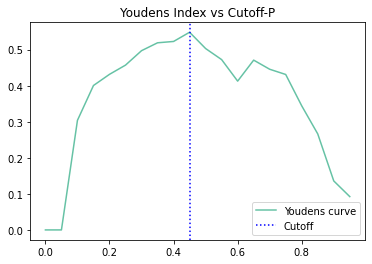

In [76]:
"""MAX YOUDENS INDEX - CUTOFF"""
max_youden_cutoff=df_cost_table.loc[df_cost_table.youden_index==df_cost_table.youden_index.max()]['cutoff'].values

plt.plot(df_cost_table.cutoff,df_cost_table.youden_index,label='Youdens curve')
plt.title('Youdens Index vs Cutoff-P')
plt.axvline(max_youden_cutoff,label='Cutoff',color='b',ls=':')
plt.legend()
print('Cutoff value according to max Youdens index : ',max_youden_cutoff);

Cutoff value according to min. Miscalc Penalty  :  [0.35]


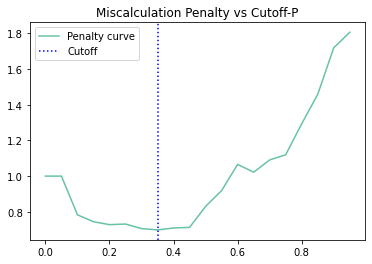

In [77]:
"""MIN PENALTY - CUTOFF"""
min_cost_cutoff=df_cost_table.loc[df_cost_table.msclaf_cost==df_cost_table.msclaf_cost.min()]['cutoff'].values

plt.plot(df_cost_table.cutoff,df_cost_table.msclaf_cost,label='Penalty curve')
plt.title('Miscalculation Penalty vs Cutoff-P')
plt.axvline(min_cost_cutoff,label='Cutoff',color='b',ls=':')
plt.legend()
print('Cutoff value according to min. Miscalc Penalty  : ',min_cost_cutoff);

'ROC CURVE AND OPTIMAL CUTOFF'

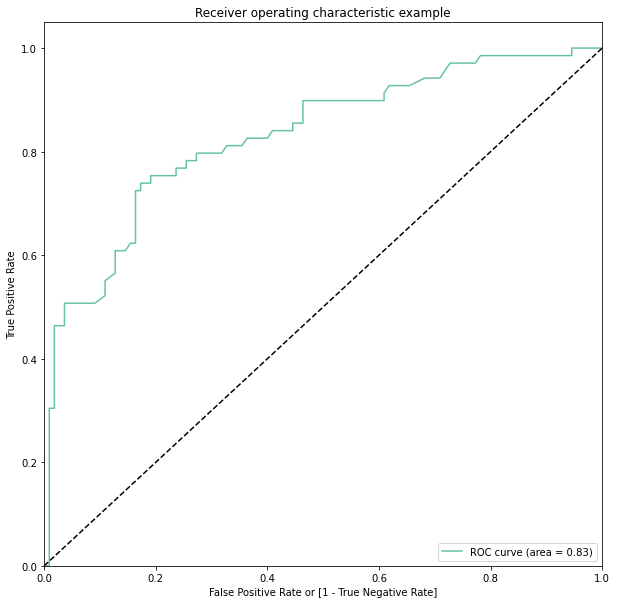

0.83

In [78]:
""'ROC CURVE AND OPTIMAL CUTOFF'""

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

fpr, tpr, thresholds = draw_roc(predict_test_df.actual, predict_test_df.predicted_prob )
auc_score = metrics.roc_auc_score( predict_test_df.actual, predict_test_df.predicted_prob  )
round( float( auc_score ), 2 )

## Actual Predictions

In [79]:
## Combining the data 
# taking signifigant variables only
y_train=train['Survived']
X_train=train[sig_var]
X_test=test[sig_var]

In [80]:
import statsmodels.api as sm
lg_reg_model2 = sm.GLM(y_train, sm.add_constant(X_train),family=sm.families.Binomial()).fit() # add const and famili bonom???
lg_reg_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            810.1564  
Link Function:      logit            BIC:            -5217.8608
Dependent Variable: Survived         Log-Likelihood: -400.08   
Date:               2021-02-22 14:21 LL-Null:        -593.33   
No. Observations:   891              Deviance:       800.16    
Df Model:           4                Pearson chi2:   934.      
Df Residuals:       886              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           2.3364   0.3066   7.6202 0.0000  1.7355  2.9374
Sex_male       -2.5648   0.1866 -13.7420 0.0000 -2.9306 -2.1990
Cabin_flag      1.2050   0.2421   4.9776 0.0000  0.7306  1.6795
Age_scaled     -2.3731   0.5678  -4.1798 0.0000 -3.4859 -1.2603
Pclass_low     -1.2903   0.2152  -5.9947 0.0000 -1.7121 -0.8684
===============================================================

"""

In [81]:
# ### Only significant variables included in the model

# pass_formula = 'Survived ~ C(Pclass)+C(Sex)  +SibSp  +Cabin_flag+Age_'


# lg_reg_model2 = smf.glm(formula=pass_formula, data=train_v4, family=sm.families.Binomial()).fit()
# lg_reg_model2.summary2()

In [82]:
"""PREDICTED CLASS WITH ACTUAL CLASS"""
def get_predictions ( test_class, model, test_data ):
    y_pred_df = pd.DataFrame( { 'actual': test_class,
                               'predicted_prob': model.get_prediction(sm.add_constant(test_data)).predicted_mean})
    return y_pred_df

'PREDICTED CLASS WITH ACTUAL CLASS'

In [83]:
'PREDICTED CLASS WITH ACTUAL CLASS'
y_test.head()

'PREDICTED CLASS WITH ACTUAL CLASS'

565    0
160    0
553    1
860    0
241    1
Name: Survived, dtype: int64

In [84]:
test

,PassengerId,SibSp,Parch,Cabin_flag,Age_,Fare_,Pclass_low,Pclass_med,Sex_male,Embarked_Q,Embarked_S,Age_scaled,Fare_scaled
0,892,0,0,0,34.0,7.829200,1,0,1,1,0,0.447368,0.015282
1,893,1,0,0,47.0,7.000000,1,0,0,0,1,0.618421,0.013663
2,894,0,0,0,62.0,9.687500,0,1,1,1,0,0.815789,0.018909
3,895,0,0,0,27.0,8.662500,1,0,1,0,1,0.355263,0.016908
4,896,1,1,0,22.0,12.287500,1,0,0,0,1,0.289474,0.023984
5,897,0,0,0,14.0,9.225000,1,0,1,0,1,0.184211,0.018006
6,898,0,0,0,30.0,7.629200,1,0,0,1,0,0.394737,0.014891
7,899,1,1,0,26.0,29.000000,0,1,1,0,1,0.342105,0.056604
8,900,0,0,0,18.0,7.229200,1,0,0,0,0,0.236842,0.014110
9,901,2,0,0,21.0,24.150000,1,0,1,0,1,0.276316,0.047138


In [85]:
'PREDICTED CLASS WITH ACTUAL CLASS'
predict_test_df = pd.DataFrame(get_predictions('', lg_reg_model2,X_test))
predict_test_df.head()

'PREDICTED CLASS WITH ACTUAL CLASS'

,actual,predicted_prob
0,,0.070419
1,,0.396172
2,,0.103003
3,,0.086141
4,,0.588845


In [86]:
#DEFAULT CUTOFF TAKEN =0.7
predict_test_df['predicted'] = predict_test_df.predicted_prob.apply(lambda x: '1' if x > 0.45 else '0')
predict_test_df[0:10]

,actual,predicted_prob,predicted
0,,0.070419,0
1,,0.396172,0
2,,0.103003,0
3,,0.086141,0
4,,0.588845,1
5,,0.123926,0
6,,0.527320,1
7,,0.261114,0
8,,0.618715,1
9,,0.102078,0


In [87]:
predictions['Survived']=predict_test_df['predicted'] 

In [88]:
## kaggle output
predictions.to_csv('LR_Output.csv',index=False)

In [89]:
train.columns

Index(['PassengerId', 'Survived', 'SibSp', 'Parch', 'Fare', 'Cabin_flag',
       'Age_', 'Pclass_low', 'Pclass_med', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Age_scaled', 'Fare_scaled'],
      dtype='object')

In [93]:
X_train=train[['SibSp', 'Parch', 'Cabin_flag',
        'Pclass_low', 'Pclass_med', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Age_scaled', 'Fare_scaled']]

y_train= train['Survived']
X_test=test[['SibSp', 'Parch', 'Cabin_flag',
        'Pclass_low', 'Pclass_med', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Age_scaled', 'Fare_scaled']]
# y_test

### Decision Trees

In [95]:

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [96]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [100]:
predictions['Survived_DT']=y_pred

In [ ]:
predictions.to_csv()

In [104]:
## kaggle output
predictions[['PassengerId','Survived_DT']].rename(columns={'Survived_DT':'Survived'}).to_csv('DT_Output.csv',index=False)

In [106]:
# Important features
for i,j in dict(zip(X_train.columns, clf.feature_importances_)).items():
    print(i,':',j)
    
#sex, age, Fare are the most important variables

SibSp : 0.049485767604352596
Parch : 0.023656109709724406
Cabin_flag : 0.04125138621362802
Pclass_low : 0.07862001247123993
Pclass_med : 0.0030374354442428515
Sex_male : 0.30895236594923703
Embarked_Q : 0.00016977876049791037
Embarked_S : 0.014717630143414552
Age_scaled : 0.26705742662682025
Fare_scaled : 0.2130520870768425


### Random forest

In [107]:
from sklearn import ensemble #linear_model, ensemble, neural_network, naive bayes, svm, tree
#dir(ensemble)

"""
The “balanced” mode uses the values of y to automatically adjust weights 
inversely proportional to class frequencies in the input data as 
n_samples / (n_classes * np.bincount(y))
"""

rf_model = ensemble.RandomForestClassifier(bootstrap=True, 
                                           criterion='gini',
                                           max_depth=4, 
                                           max_features='auto',
                                           min_impurity_decrease=0.001,
                                           min_samples_leaf=30, 
                                           min_samples_split=50,
                                           class_weight="balanced_subsample", #to remove class imbalance (balanced)
                                           n_estimators=500,
                                           oob_score=True, 
                                           random_state=42, 
                                           verbose=0,
                                           warm_start=False)

rf_model.fit(X_train,y_train.values.ravel())
#rf_model.fit(os_data_X,os_data_y)

'\nThe “balanced” mode uses the values of y to automatically adjust weights \ninversely proportional to class frequencies in the input data as \nn_samples / (n_classes * np.bincount(y))\n'

RandomForestClassifier(class_weight='balanced_subsample', max_depth=4,
                       min_impurity_decrease=0.001, min_samples_leaf=30,
                       min_samples_split=50, n_estimators=500, oob_score=True,
                       random_state=42)

In [108]:
# Number of trees in random forest
n_estimators = [100,120,130,150]

# Maximum number of levels in tree
max_depth = [2,3,4,5,6,7,8,9]
max_depth.append(None)

# Number of features to consider at every split
max_features = ['auto', 'log2']

# Minimum number of samples required to split a node
min_samples_split = [50, 75, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [30, 35, 40]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# How to remove the class imbalance
class_weight=['balanced_subsample','balanced']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight': class_weight}
random_grid

{'n_estimators': [100, 120, 130, 150],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, None],
 'max_features': ['auto', 'log2'],
 'min_samples_split': [50, 75, 100],
 'min_samples_leaf': [30, 35, 40],
 'bootstrap': [True, False],
 'class_weight': ['balanced_subsample', 'balanced']}

In [109]:
from sklearn.metrics import SCORERS

SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [116]:
from sklearn.model_selection import RandomizedSearchCV
#RandomizedSearchCV?

# Use the random grid to search for best hyperparameters
# from sklearn.model_selection import RandomizedSearchCV

rf_model = ensemble.RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
rf_best_model = RandomizedSearchCV(estimator = rf_model, 
                               param_distributions = random_grid, scoring = "accuracy",
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -2, pre_dispatch =2)

rf_best_model.fit(X_train,y_train.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-2,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced_subsample',
                                                         'balanced'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      None],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [30, 35, 40],
                                        'min_samples_split': [50, 75, 100],
                                        'n_estimators': [100, 120, 130, 150]},
                   pre_dispatch=2, random_state=42, scoring='accuracy',
                   verbose=2)

In [117]:
rf_best_model=rf_best_model.best_estimator_
# Fit the random search model
rf_best_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       min_samples_leaf=30, min_samples_split=50,
                       n_estimators=120)

In [118]:
predictions['Survived_RF']=y_pred

In [119]:
## kaggle output
predictions[['PassengerId','Survived_RF']].rename(columns={'Survived_RF':'Survived'}).to_csv('RF_Output.csv',index=False)

In [120]:
# Important features
for i,j in dict(zip(X_train.columns, rf_best_model.feature_importances_)).items():
    print(i,':',j)
    
#sex, age, Fare are the most important variables

SibSp : 0.019890886433979776
Parch : 0.015025459951365748
Cabin_flag : 0.09638827970762523
Pclass_low : 0.13601059206778726
Pclass_med : 0.009268492078546624
Sex_male : 0.5100066329112418
Embarked_Q : 0.007634550731005425
Embarked_S : 0.024089462094082525
Age_scaled : 0.043742074305676955
Fare_scaled : 0.13794356971868865


### Adaboost Classifier

In [123]:
from sklearn.ensemble import AdaBoostClassifier

# adaboost with the tree as base estimator

estimators = list(range(100, 150, 10))

# abc_scores = []
# for n_est in estimators:
#     ABC = AdaBoostClassifier( n_estimators = n_est, random_state=101)
    
#     ABC.fit(X_train, y_train)
#     y_pred = ABC.predict(X_test)
#     score = metrics.accuracy_score(y_test, y_pred)
#     abc_scores.append(score)
#     print(n_est,':',score)

In [124]:
adb_classifier = AdaBoostClassifier(
    n_estimators=130, random_state=101
)

adb_classifier.fit(X_train, y_train)
adb_predicted=adb_classifier.predict(X_test)

AdaBoostClassifier(n_estimators=130, random_state=101)

In [125]:
predictions['Survived_ADB']=adb_predicted

In [126]:
## kaggle output
predictions[['PassengerId','Survived_ADB']].rename(columns={'Survived_ADB':'Survived'}).to_csv('ADB_Output.csv',index=False)

In [127]:
# Important features
for i,j in dict(zip(X_train.columns, adb_classifier.feature_importances_)).items():
    print(i,':',j)
    
#sex, age, Fare are the most important variables

SibSp : 0.03076923076923077
Parch : 0.023076923076923078
Cabin_flag : 0.015384615384615385
Pclass_low : 0.023076923076923078
Pclass_med : 0.007692307692307693
Sex_male : 0.023076923076923078
Embarked_Q : 0.0
Embarked_S : 0.015384615384615385
Age_scaled : 0.25384615384615383
Fare_scaled : 0.6076923076923076


In [ ]:
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold

### Gradient Boosting

In [128]:
from sklearn.ensemble import GradientBoostingClassifier



# define the model
GBM = GradientBoostingClassifier()
# define the evaluation method
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
# n_scores = cross_val_score(model, X, y, scoring='precision', n_jobs=-1)
# report performance
# print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
GBM.fit(X_train,y_train.values.ravel())



gbm_predict=GBM.predict(X_test)

GradientBoostingClassifier()

In [130]:
predictions['Survived_GBM']=gbm_predict

In [131]:
## kaggle output
predictions[['PassengerId','Survived_GBM']].rename(columns={'Survived_GBM':'Survived'}).to_csv('GBM_Output.csv',index=False)

In [133]:
# Important features
for i,j in dict(zip(X_train.columns, GBM.feature_importances_)).items():
    print(i,':',j)
    
#sex, age, Fare are the most important variables

SibSp : 0.05514408316317161
Parch : 0.0056931919201845
Cabin_flag : 0.04525433533894872
Pclass_low : 0.12046380849354155
Pclass_med : 0.0022436657254456516
Sex_male : 0.47160194898796304
Embarked_Q : 0.0028713268042230454
Embarked_S : 0.015645585079628654
Age_scaled : 0.13926606453916246
Fare_scaled : 0.14181598994773084


Only taking good variables from all of the above modelling and analysis and applying XGBoost

In [ ]:
X_train[['Sex_male','Age_scaled','Fare_scaled','SibSp','Cabin_flag']]

In [135]:
X_train=X_train[['Sex_male','Age_scaled','Fare_scaled','SibSp','Cabin_flag']]
X_test=X_test[['Sex_male','Age_scaled','Fare_scaled','SibSp','Cabin_flag']]

In [137]:
import xgboost as xgb
from sklearn import metrics

xgclf = xgb.XGBClassifier()

xgclf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import model_selection

In [149]:
X_train.describe()
X_train.info()

,Sex_male,Age_scaled,Fare_scaled,SibSp,Cabin_flag
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.647587,0.372208,0.062858,0.523008,0.228956
std,0.477990,0.170025,0.096995,1.102743,0.420397
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.262500,0.015440,0.000000,0.000000
50%,1.000000,0.362500,0.028213,0.000000,0.000000
75%,1.000000,0.462500,0.060508,1.000000,0.000000
max,1.000000,1.000000,1.000000,8.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex_male     891 non-null    int64  
 1   Age_scaled   891 non-null    float64
 2   Fare_scaled  891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Cabin_flag   891 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [150]:
# 1st-Run for best hyperparameters
parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth': [2, 4, 6, 8, 10],
              'min_child_weight': [3, 7, 11, 19, 25],
              'n_estimators': [50, 100, 150, 200]}

# scorer = metrics.make_scorer(metrics.accuracy_score,
#                              greater_is_better=True,
#                              needs_proba=True,
#                              needs_threshold=False)

clf_xgb = GridSearchCV(estimator=xgclf,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring="accuracy",
                                       refit=True)

clf_xgb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [157]:
print(clf_xgb.best_estimator_)
clf_xgb_best=clf_xgb.best_estimator_
clf_xgb_best.fit(X_train,y_train.values.ravel())



xgb_predict=clf_xgb_best.predict(X_test)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [152]:
predictions['Survived_XGB']=xgb_predict

In [153]:
## kaggle output
predictions[['PassengerId','Survived_XGB']].rename(columns={'Survived_XGB':'Survived'}).to_csv('XGB_Output.csv',index=False)

In [154]:
# Important features
for i,j in dict(zip(X_train.columns, clf_xgb_best.feature_importances_)).items():
    print(i,':',j)
    
#sex, age, Fare are the most important variables

Sex_male : 0.7040768
Age_scaled : 0.046351783
Fare_scaled : 0.037178196
SibSp : 0.06959821
Cabin_flag : 0.14279492
